## Modelo KNN
### Integrante encargado del desarrollo del algoritmo: Jaime Esteban Alfonso Ruiz - 202116525

### Importar librerias y cargar los datos de la primera parte

In [34]:
# Pandas
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas
pd.set_option('display.max_rows', 50) # Numero máximo de filas

# Numpy
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Vectorización de texto
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelos
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Import SGD Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Métricas
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Optimización modelo
from sklearn.model_selection import GridSearchCV

# Guardar modelo
import joblib, pickle

In [2]:
# Importar datos
db_route = 'sample_data/processed_data.csv'
df = pd.read_csv(db_route)

# Imprimir número de filas
print('Número de filas: ', df.shape[0])
# Imprimir número de columnas
print('Número de columnas: ', df.shape[1])
pd.set_option('display.max_columns', None) # Número máximo de columnas

df.sample(5)

Número de filas:  5000
Número de columnas:  2


,sentimiento,tokens
3627,1,los ochent produjeron un gran cantidad de pelu...
3737,1,esto siempr ha sido un de mis pelcula favorita...
4386,0,oh pilot men cal cockpit noth honey dialog lik...
2953,1,un docu conmov que pon un rostro humano en la ...
645,1,un peque encantador pelcul encantador par est ...


In [3]:
# Contar valores nulos
df.isnull().sum()

sentimiento    0
tokens         0
dtype: int64

#### Ahora separamos los datos de manera individual

In [4]:
# División entre variables independientes y dependientes
X = df['tokens']
Y = df['sentimiento']

In [37]:
# Vectorización de texto
vectorizer = TfidfVectorizer(max_df=1200, min_df=2, max_features=10000, ngram_range=(1,2))
X_count = vectorizer.fit_transform(X)
print(X_count.shape)

(5000, 10000)


In [38]:
# Separamos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_count, Y, test_size=0.2, random_state=42)


### Implementacion del Modelo

In [42]:
# Parametros usados para GridSearchCV
parameters = {
   'n_neighbors':[2,5,10,15,50] 
} 

In [43]:
# Crear modelo
model =KNeighborsClassifier()
# Creacion del modelo usando GridSearchCV
b_model = GridSearchCV(model, parameters, cv=4, verbose=1)
b_model
# Entrenamiento del modelo
b_model.fit(X_train, Y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 10, 15, 50]}, verbose=1)

### Ahora hacemos la evaluacion del modelo para poder medir su fidelidad

In [46]:
#se elige el mejor modelo
final = b_model.best_estimator_
# Predicción
Y_pred = final.predict(X_test)

# Todos los puntos que se evaluaran en el modelo
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('F1: ', f1_score(Y_test, Y_pred, average='weighted'))
print('Precision: ', precision_score(Y_test, Y_pred, average='weighted'))
print('Recall: ', recall_score(Y_test, Y_pred, average='weighted'))
print(classification_report(Y_test, Y_pred))

Accuracy:  0.763
F1:  0.7630063990575916
Precision:  0.7631364089107208
Recall:  0.763
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       494
           1       0.77      0.76      0.76       506

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



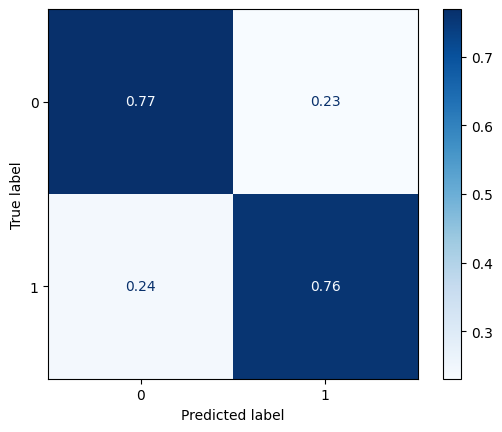

In [47]:
ConfusionMatrixDisplay.from_estimator(b_model, X_test, Y_test, cmap=plt.cm.Blues, normalize='true')

In [56]:
# Se usa la función dump de la librería pickle para serializar el modelo
filename = 'KNN.pkl'
pickle.dump(final, open(filename, 'wb'))

# Exportar vectorizer con joblib
joblib.dump(vectorizer, 'sample_data/vectorizer.joblib')

['sample_data/vectorizer.joblib']